In [ ]:
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix

In [ ]:
from sklearn.svm import SVC,LinearSVC

In [ ]:
# import sklearn
# from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
# from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve, ShuffleSplit
# from sklearn.model_selection import cross_val_predict as cvp
# from sklearn import metrics
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score

# # models
# from sklearn.linear_model import LogisticRegression, LogisticRegression, Perceptron, RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
# from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
# from sklearn import metrics
# import xgboost as xgb
from xgboost import XGBClassifier
# import lightgbm as lgb
# from lightgbm import LGBMClassifier

# # NN models
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier


In [ ]:
# !pip install pandas-profiling==2.7.1

In [ ]:
df=pd.read_csv('/content/datasets_33180_43520_heart.csv')

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# pp.ProfileReport(df)

In [ ]:
data1=df.copy()
data2=df.copy()

In [ ]:
data1['sex'].replace({1:'Male',0:'Female'},inplace=True)

In [ ]:
sex_age_viz=data1.groupby(['age','cp'])['target'].count().reset_index().sort_values(by='target',ascending=False)
sex_age_viz.head(10).style.background_gradient(cmap='Purples')

,age,cp,target
59,57,0,11
62,58,0,10
70,60,0,7
76,62,0,7
42,51,2,7
52,54,2,7
66,59,0,7
19,43,0,6
13,41,1,6
50,54,0,6


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd77ccad978>,
      dtype=object)

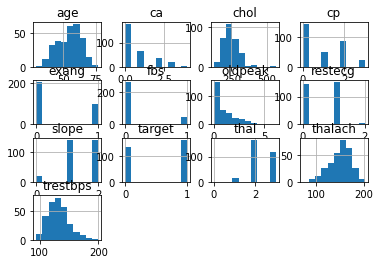

In [ ]:
data1.hist()

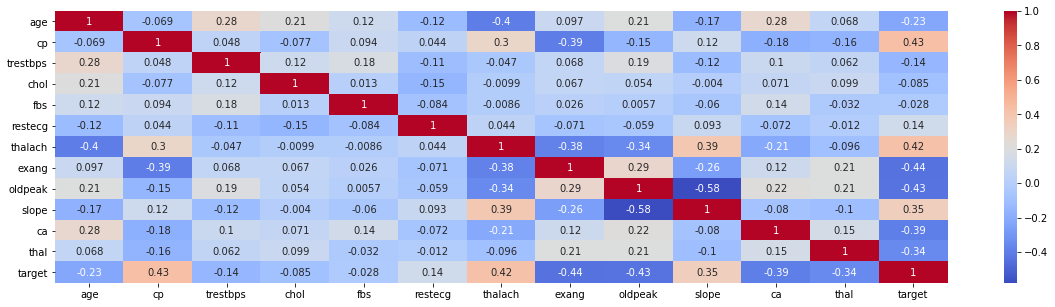

In [ ]:
corrmat=data1.corr()
top_feature=corrmat.index
plt.figure(figsize=(20,5))
sns.heatmap(data1[top_feature].corr(),annot=True,cmap='coolwarm')

In [ ]:
data1.corr()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
cp,-0.068653,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696
slope,-0.168814,0.119717,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,0.345877


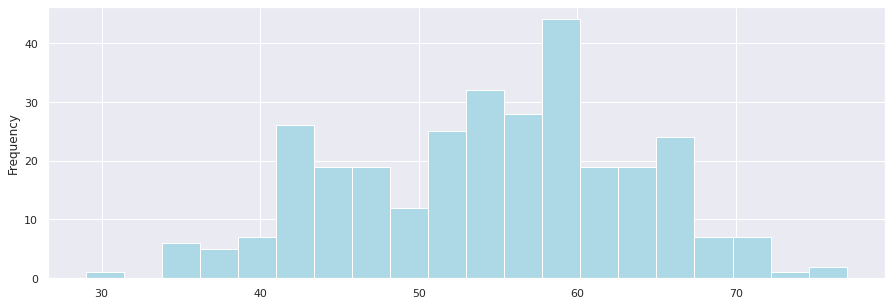

In [ ]:
sns.set(rc={'figure.figsize':(15,5)})
df['age'].plot.hist(bins=20, color='lightblue')

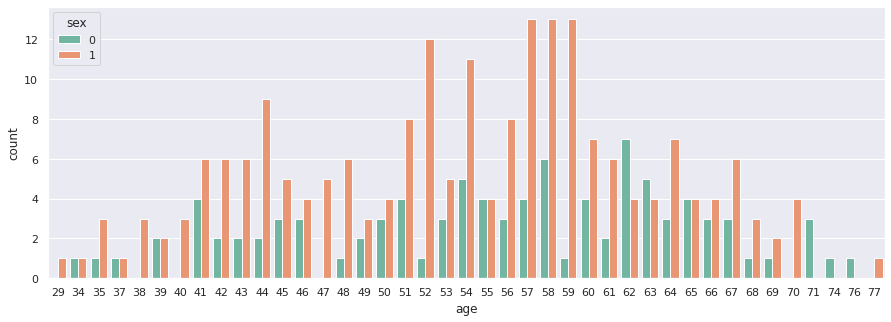

In [ ]:
sns.countplot(x='age',hue='sex',data=data2,palette='Set2')

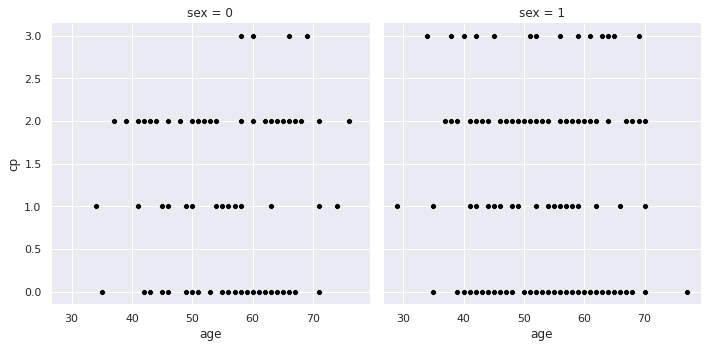

In [ ]:
sns.relplot(x='age',y='cp',col='sex', data=data2,color='black')

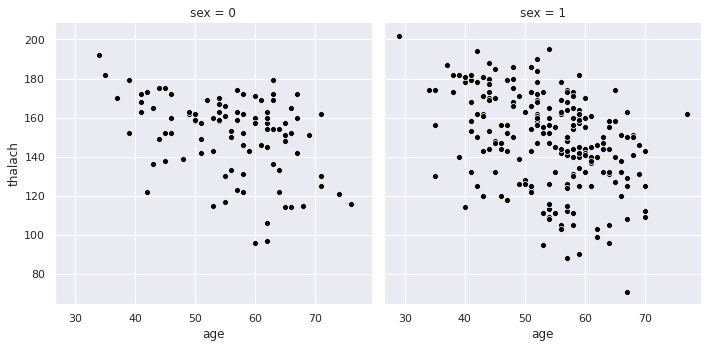

In [ ]:
sns.relplot(x='age',y='thalach',col='sex', data=data2,color='black')

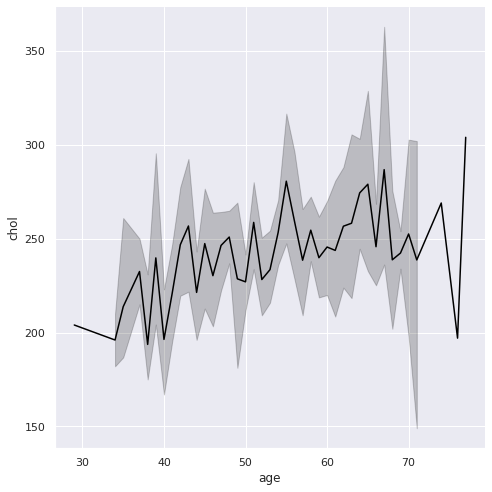

In [ ]:
sns.relplot(x='age',y='chol',kind='line', data=data2,aspect=1,height=7,color='black')

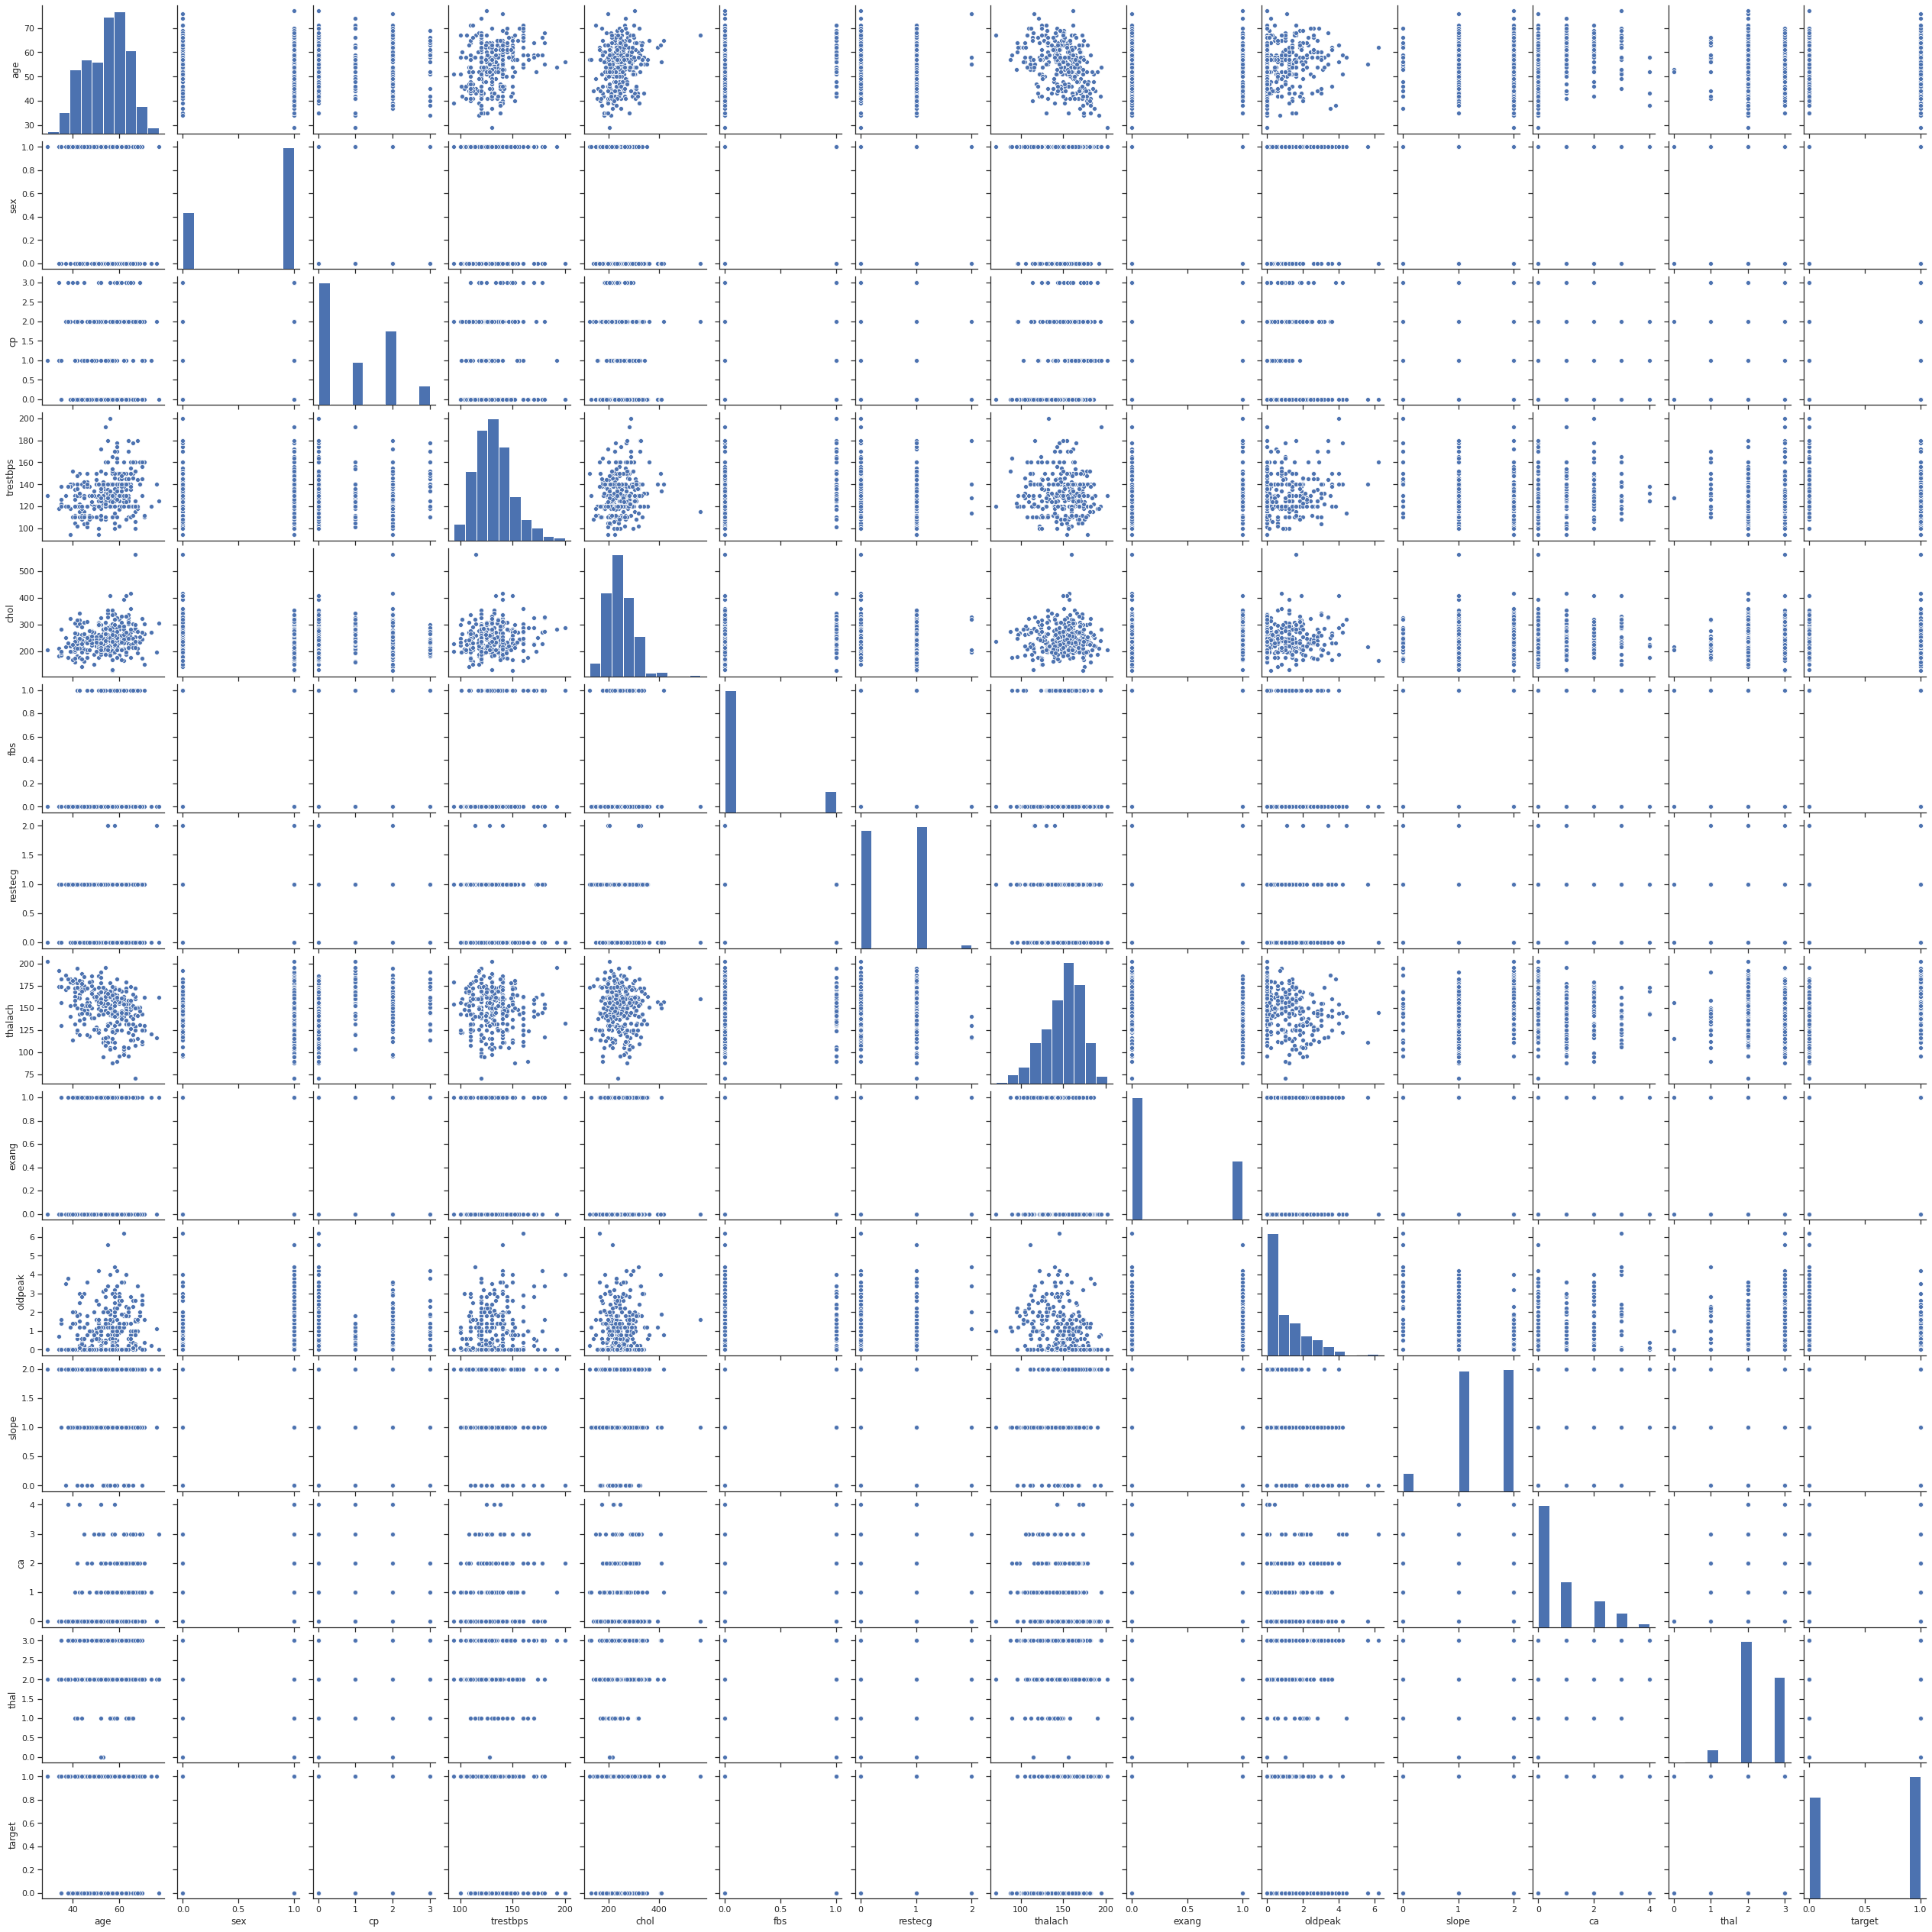

In [ ]:
sns.set(style='ticks',color_codes=True)
sns.pairplot(data2)

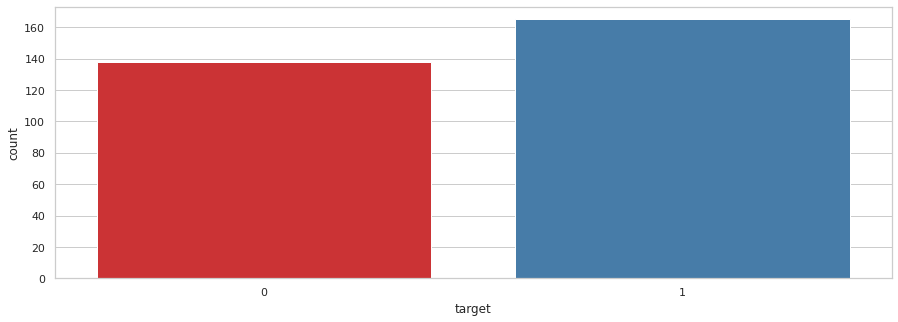

In [ ]:
sns.set(style='whitegrid')
sns.countplot(x='target',data=data2,palette='Set1')

In [ ]:
categorical_dummy_var=pd.get_dummies(data2,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [ ]:
standardscaler=StandardScaler()

In [ ]:
columns_to_scale=['age','trestbps','chol','thalach','oldpeak']

In [ ]:
categorical_dummy_var[columns_to_scale]=standardscaler.fit_transform(categorical_dummy_var[columns_to_scale])

In [ ]:
categorical_dummy_var.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [ ]:
data_with_dummies=categorical_dummy_var.copy()    

In [ ]:
data_with_dummies.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [ ]:
target_col=data_with_dummies['target']
final_data=data_with_dummies.drop(['target'],axis=1)

In [ ]:
target_col

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
len(final_data.columns)

30

In [ ]:
final_data.shape

(303, 30)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(final_data,target_col,test_size=0.2,random_state=5)

In [ ]:
cv_n_split=2
random_state=42

In [ ]:
cv_train = ShuffleSplit(n_splits=cv_n_split, test_size=0.2, random_state=random_state)

In [ ]:
y_train

266    0
215    0
99     1
119    1
11     1
      ..
8      1
73     1
118    1
189    0
206    0
Name: target, Length: 242, dtype: int64

In [ ]:
#Linear Regression
C=[0.01,0.1,1,5,10] 
param_grid = {'C': [.1 ,2 ,5 ,10 ,15 ,20]}
lin_reg=LogisticRegression()
lin_regCV=GridSearchCV(lin_reg,param_grid=param_grid,cv=cv_train,verbose=False)
lin_regCV.fit(x_train,y_train)



GridSearchCV(cv=ShuffleSplit(n_splits=2, random_state=42, test_size=0.2, train_size=None),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 2, 5, 10, 15, 20]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=False)

In [ ]:
lin_regCV.best_params_

{'C': 0.1}

In [ ]:
accuracy1=lin_regCV.score(x_test,y_test)  

In [ ]:
accuracy1

0.9180327868852459

In [ ]:
model1=LogisticRegression(C=0.1)
model1.fit(x_train,y_train)
accuracy1=model1.score(x_test,y_test)  

In [ ]:
accuracy1

0.9180327868852459

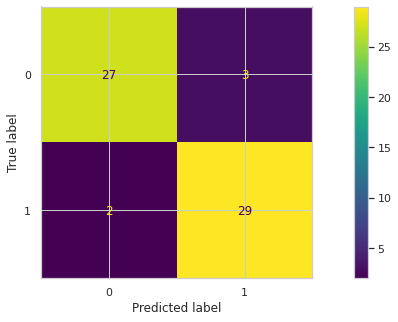

In [ ]:
plot_confusion_matrix(model1,x_test,y_test)

In [ ]:
# Support Vector Machines

model2=SVC()
model2_cv=GridSearchCV(model2, param_grid={'kernel':['linear', 'poly','rbf','sigmoid'],'tol':[1e-4]},cv=cv_train, verbose=False)

model2_cv.fit(x_train,y_train)
accuracy2=model2_cv.score(x_test,y_test)


In [ ]:
accuracy2

0.8688524590163934

In [ ]:
#Linear SVC
model3=LinearSVC()
model3_cv=GridSearchCV(model3, param_grid={},cv=cv_train, verbose=False)

model3_cv.fit(x_train,y_train)
accuracy3=model3_cv.score(x_test,y_test)
accuracy3

0.8852459016393442

In [ ]:
#MLP Classifier  Multi-layer Perceptron
model4=MLPClassifier()
param={'hidden_layer_sizes': [i for i in range(2,5)],
              'solver': ['sgd'],
              'learning_rate': ['adaptive'],
              'max_iter': [1000]
              }
model4_cv=GridSearchCV(model4, param_grid=param,cv=cv_train, verbose=False)

model4_cv.fit(x_train,y_train)
accuracy4=model4_cv.score(x_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
accuracy4

0.9180327868852459

In [ ]:
#Stochastic Gradient Descent

model5=SGDClassifier()
model5_cv=GridSearchCV(model5, param_grid={},cv=cv_train, verbose=False)

model5_cv.fit(x_train,y_train)
accuracy5=model5_cv.score(x_test,y_test)
accuracy5

0.9180327868852459

In [ ]:
#Decision Tree Classifier
model6=DecisionTreeClassifier()
model6_cv=GridSearchCV(model6, param_grid={},cv=cv_train, verbose=False)

model6_cv.fit(x_train,y_train)
accuracy6=model6_cv.score(x_test,y_test)
accuracy6

0.8688524590163934

In [ ]:
#Random Forest
model7=RandomForestClassifier()
param= {'n_estimators': [50, 100, 150, 200], 'min_samples_split': [60], 'min_samples_leaf': [10, 20, 25, 30, 35], 
              'max_features': ['auto'], 'max_depth': [5, 6, 7, 8], 'criterion': ['gini'], 'bootstrap': [False]}
model7_cv=GridSearchCV(model7, param_grid=param,cv=cv_train, verbose=False)

model7_cv.fit(x_train,y_train)
accuracy7=model7_cv.score(x_test,y_test)
accuracy7

0.8524590163934426

In [ ]:
#XGBClassifier

model8=XGBClassifier(objective='reg:squarederror')
param={'n_estimators': [50, 100, 150], 
              'learning_rate': [0.005, 0.01, 0.02, 0.05],
              'max_depth': [3, 4, 5]}
model8_cv=GridSearchCV(model8, param_grid=param,cv=cv_train, verbose=False)

model8_cv.fit(x_train,y_train)
accuracy8=model8_cv.score(x_test,y_test)
accuracy8

0.9180327868852459

In [ ]:
#AdaBoost Classifier

model9=AdaBoostClassifier()
param={'learning_rate' : [.01, .1, .5, 1]}
model9_cv=GridSearchCV(model9, param_grid=param,cv=cv_train, verbose=False)

model9_cv.fit(x_train,y_train)
accuracy9=model9_cv.score(x_test,y_test)
accuracy9

0.9016393442622951

In [ ]:
#KNN - k-Nearest Neighbors algorithm


model10=KNeighborsClassifier()
param={'n_neighbors': range(2, 7)}
model10_cv=GridSearchCV(model10, param_grid=param,cv=cv_train, verbose=False)

model10_cv.fit(x_train,y_train)
accuracy10=model10_cv.score(x_test,y_test)
accuracy10

0.819672131147541

In [ ]:
len(x_train)

242

In [ ]:
# scaler = MinMaxScaler()
# train0 = pd.DataFrame(scaler.fit_transform(final_data), columns = final_data.columns)
scaler2 = StandardScaler()
train0 = pd.DataFrame(scaler2.fit_transform(final_data), columns = final_data.columns)

In [ ]:
len(train0.columns)

30

In [ ]:
def build_nn(optimizer='adam'):

    # Initializing the NN
    nn = Sequential()

    # Adding the input layer and the first hidden layer of the NN
    nn.add(Dense(units=32, kernel_initializer='he_normal', activation='relu'))
    # Adding the output layer
    nn.add(Dense(units=1, kernel_initializer='he_normal', activation='sigmoid'))

    # Compiling the NN
    nn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return nn

In [ ]:
Xtrain, Xval, Ztrain, Zval = train_test_split(x_train ,y_train, test_size=0.2, random_state=random_state)
nn_model = build_nn(optimizers.Adam(lr=0.001))
nn_model.fit(Xtrain, Ztrain, batch_size=17,epochs=10, validation_data=(Xval, Zval))
#acc_metrics_calc(17,nn_model,x_train,x_test,y_train,y_test)

Epoch 1/10

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

12/12 [==============================] - 0s 16ms/step - loss: 0.8253 - accuracy: 0.4560 - val_loss: 0.7722 - val_accuracy: 0.4286
Epoch 2/10
12/12 [==============================] - 0s 3ms/step - loss: 0.7450 - accuracy: 0.5285 - val_loss: 0.7111 - val_accuracy: 0.5102
Epoch 3/10
12/12 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.6062 - val_loss: 0.6609 - val_accuracy: 0.5510
Epoch 4/10
12/12 [==============================] - 0s 4ms/step - loss: 0.6412 - accura

In [ ]:
#Neural Network
modelNN=tf.keras.Sequential([tf.keras.layers.Dense(units=32,activation='relu',input_shape=len(x_train.columns)),
                             tf.keras.layers.Dense(unit=1,activation='softmax')])
modelNN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
Xtrain, Xval, Ztrain, Zval = train_test_split(x_train, y_train, test_size=0.2, random_state=random_state)
modelNN.fit(Xtrain, Ztrain, batch_size=16, validation_data=(Xval, Zval),epochs=5)
accuracyNN=modelNN.score(x_test,y_test)
accuracyNN